# Generating figure 1.2

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import pybedtools as pbt
from collections import Counter
import random
from random import Random
from math import ldexp
import json
from collections import Counter
from scipy.stats import poisson
import matplotlib
from matplotlib import pyplot as plt

## Importing TFs data

In [74]:
def import_TF_bed(path, sep=";", header=0):
    df=pd.read_csv(path, sep=sep, header = header)
    df.columns = [x for x in range(df.shape[1])]
    df["middle"] = df[1] + (df[2] - df[1])//2
    df[1] = df["middle"]
    df[2] = df["middle"]
    df = df.drop(["middle"], axis=1)
    df = df[[0,1,2]]
    return df

Nr5a2 = import_TF_bed('./tables/science.abn7478_table_s10.csv')
# Obox data were converted from mm9 to mm10 with https://genome.ucsc.edu/cgi-bin/hgLiftOver
Obox1 = import_TF_bed('./tables/hglft_genome_7e52_b4b220.bed', sep="\t")
Obox5 = import_TF_bed('./tables/hglft_genome_8f25_b4b8c0.bed', sep="\t")
Obox3 = import_TF_bed('./tables/hglft_genome_9296_b4baa0.bed', sep="\t")
Obox15 = pbt.BedTool.intersect(pbt.BedTool.from_dataframe(Obox1), pbt.BedTool.from_dataframe(Obox5), c=True).to_dataframe()
Obox15 = Obox15[["chrom","start","end"]]

Dux_rep1 = import_TF_bed('./tables/rep1_41588_2017_BFng3844_MOESM322_ESM.csv')
Dux_rep2 = import_TF_bed('./tables/rep2_41588_2017_BFng3844_MOESM322_ESM.csv')
Dux = pbt.BedTool.intersect(pbt.BedTool.from_dataframe(Dux_rep1), pbt.BedTool.from_dataframe(Dux_rep2), c=True).to_dataframe()
Dux = Dux[["chrom","start","end"]]


TF1 = Nr5a2
TF2 = Dux

TF1n = "Nr5a2"
TF2n = "Dux"

In [75]:
Nr5a2.to_csv('./tables/Nr5a2_peaks.bed', sep=" ", header=None, index=False)
Obox3.to_csv('./tables/Obox3_peaks.bed', sep=" ", header=None, index=False)
Dux.to_csv('./tables/Dux_peaks.bed', sep=" ", header=None, index=False)

/var/folders/fz/qb92b10d6d18gb2mcr1t_ls80000gq/T/ipykernel_54167/834373980.py:7: RuntimeWarning: divide by zero encountered in log10
  df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))


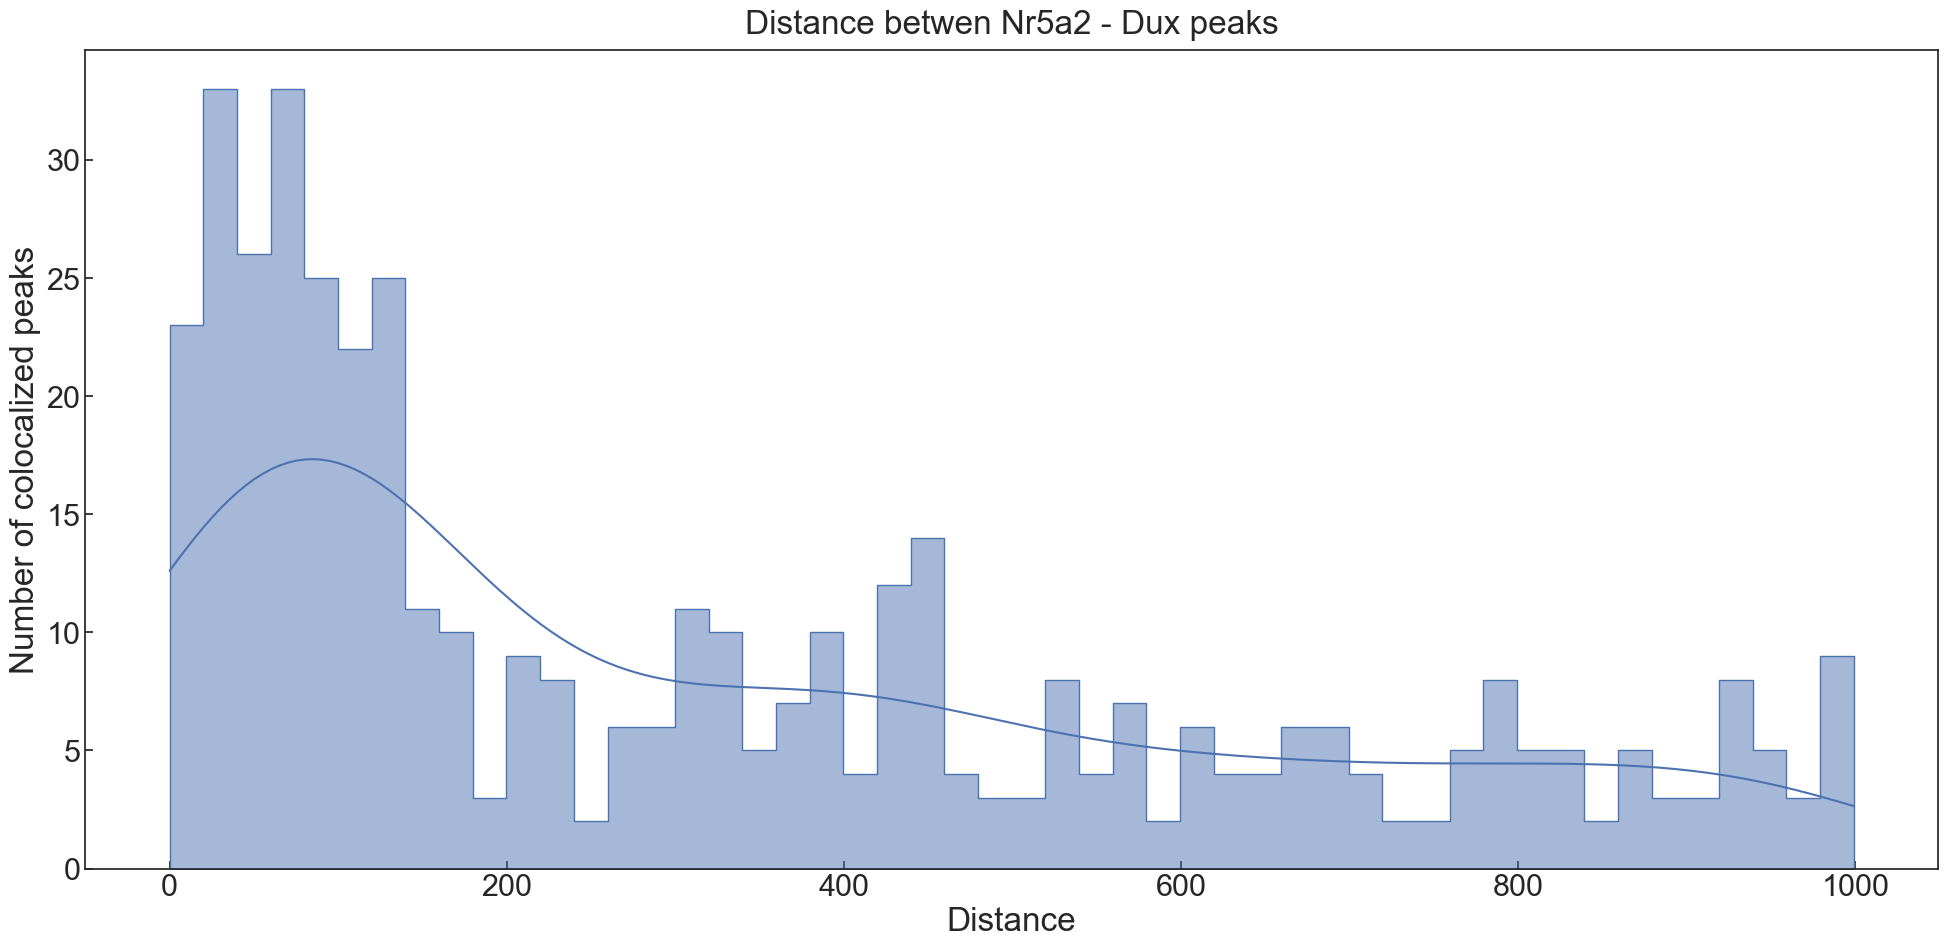

In [76]:
df = pbt.BedTool.from_dataframe(Nr5a2).sort().closest(pbt.BedTool.from_dataframe(Dux).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)
df = df[abs(df[6]) < 1000]
mu = 1
rv = poisson(mu)

df["Distance"] = abs(df[6])
df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'
matplotlib.rcParams['figure.figsize'] = 20, 10
ax = sns.histplot(data=df, x="Distance", bins=50, kde=True, element="step")
ax.set(xlabel='Distance', ylabel='Number of colocalized peaks')
plt.title(f"Distance betwen Nr5a2 - Dux peaks", y=1.01)
plt.tight_layout()
plt.show()

/var/folders/fz/qb92b10d6d18gb2mcr1t_ls80000gq/T/ipykernel_54167/1276192122.py:7: RuntimeWarning: divide by zero encountered in log10
  df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))


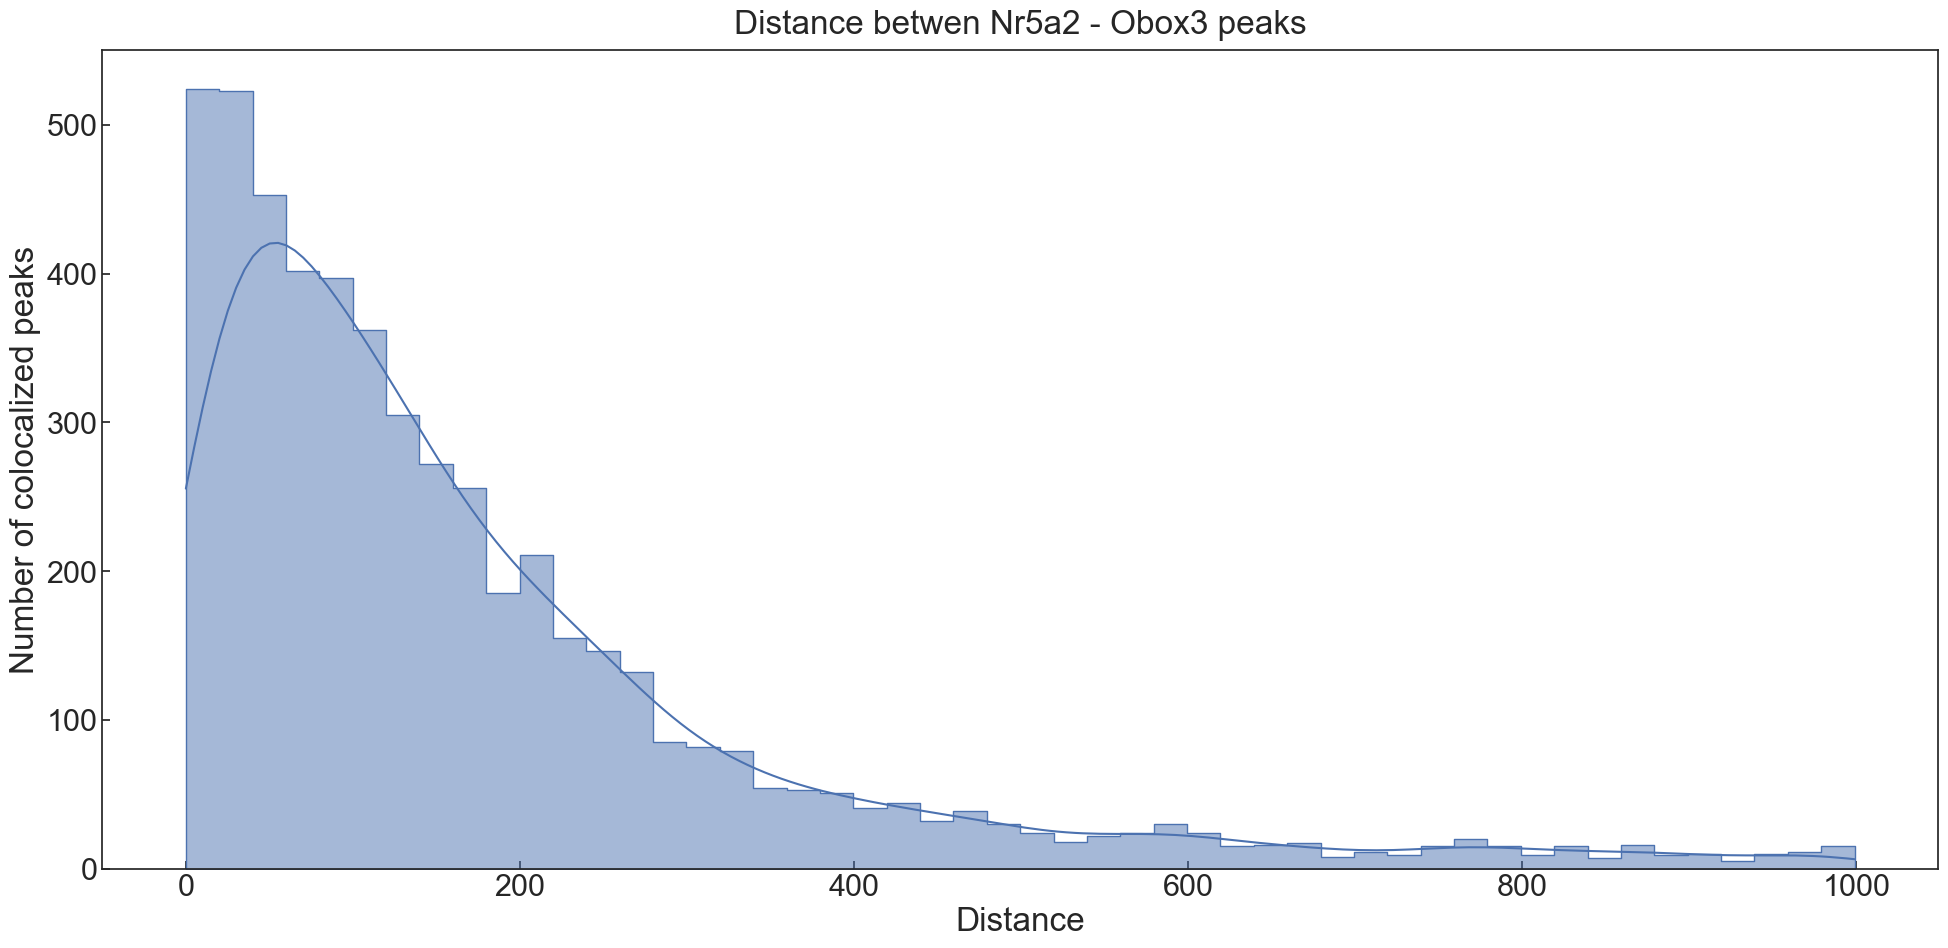

In [77]:
df = pbt.BedTool.from_dataframe(Nr5a2).sort().closest(pbt.BedTool.from_dataframe(Obox3).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)
df = df[abs(df[6]) < 1000]
mu = 1
rv = poisson(mu)

df["Distance"] = abs(df[6])
df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'
matplotlib.rcParams['figure.figsize'] = 20, 10
ax = sns.histplot(data=df, x="Distance", bins=50, kde=True, element="step")
ax.set(xlabel='Distance', ylabel='Number of colocalized peaks')
plt.title(f"Distance betwen Nr5a2 - Obox3 peaks", y=1.01)
plt.tight_layout()
plt.show()

/var/folders/fz/qb92b10d6d18gb2mcr1t_ls80000gq/T/ipykernel_54167/2517709951.py:7: RuntimeWarning: divide by zero encountered in log10
  df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))


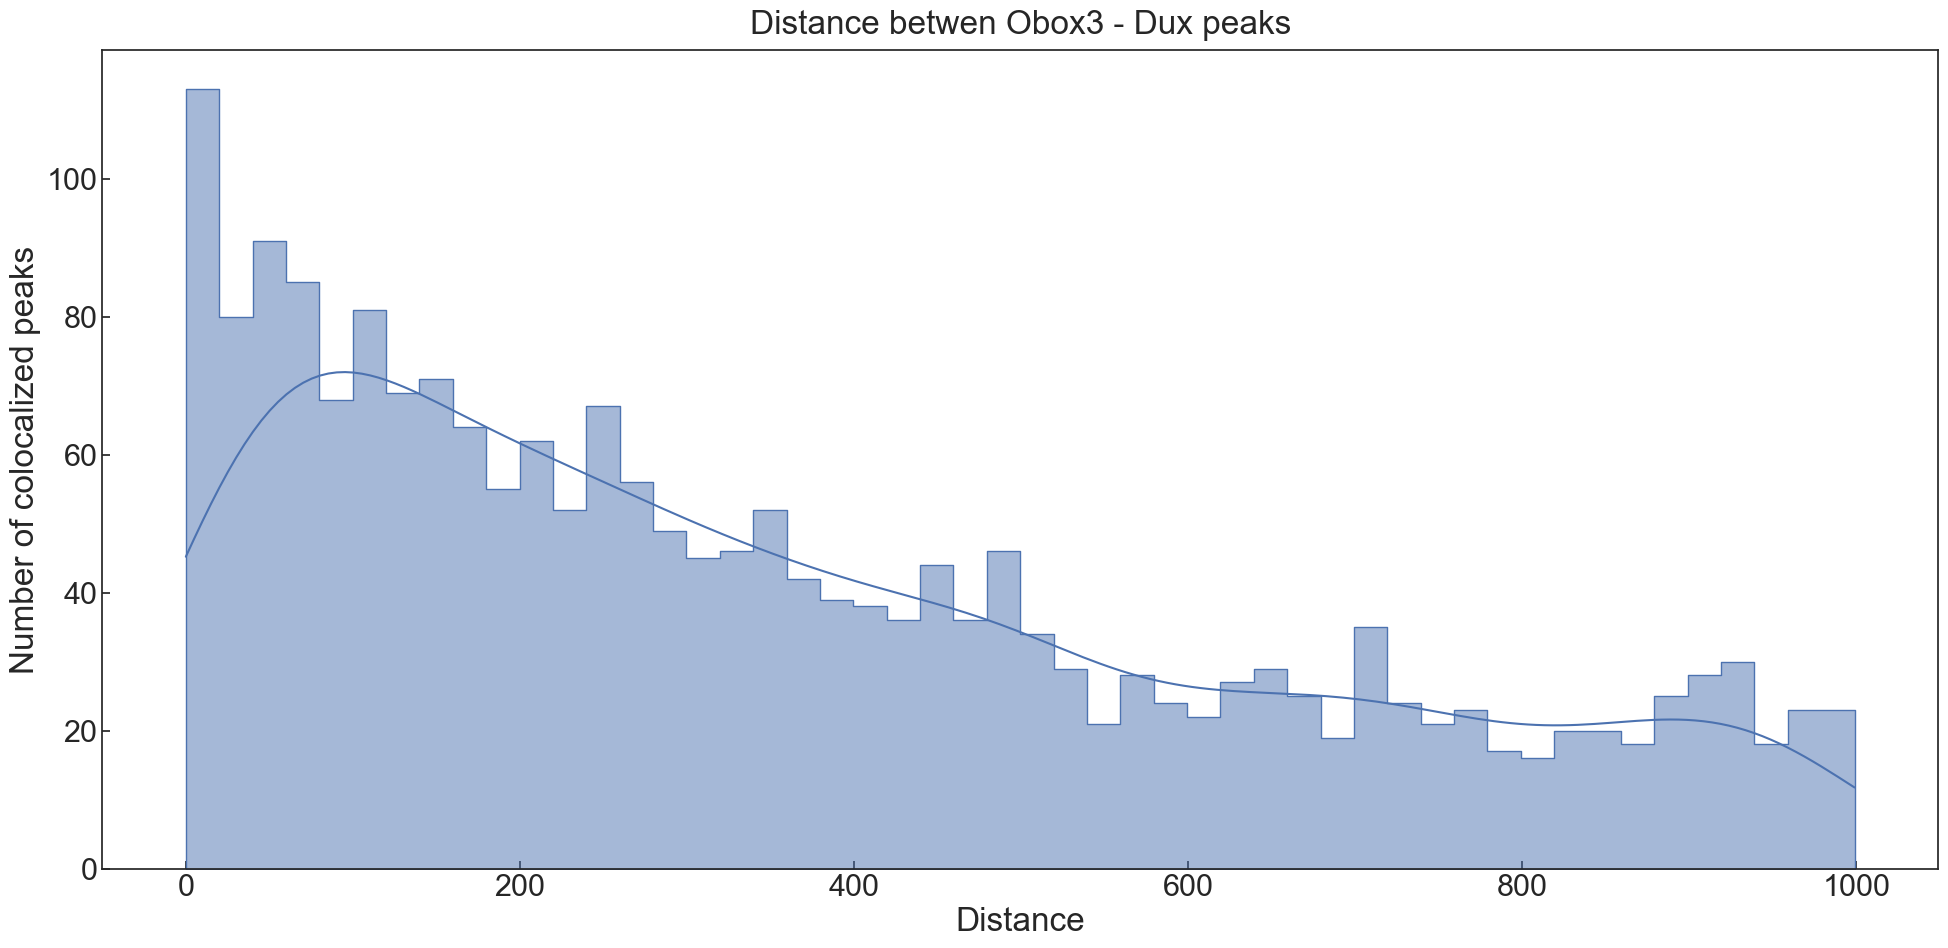

In [78]:
df = pbt.BedTool.from_dataframe(Obox3).sort().closest(pbt.BedTool.from_dataframe(Dux).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)
df = df[abs(df[6]) < 1000]
mu = 1
rv = poisson(mu)

df["Distance"] = abs(df[6])
df["-log10 Poisson P-value"] = -1*np.log10(np.array([rv.pmf(x) for x in df["Distance"]]))

sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'
matplotlib.rcParams['figure.figsize'] = 20, 10
ax = sns.histplot(data=df, x="Distance", bins=50, kde=True, element="step")
ax.set(xlabel='Distance', ylabel='Number of colocalized peaks')
plt.title(f"Distance betwen Obox3 - Dux peaks", y=1.01)
plt.tight_layout()
plt.show()

## A toy example

In [79]:
dfa = pd.DataFrame({0:["chr1","chr1","chr1"], 1:[1,2,9], 2:[4,5,9]})

dfb = pd.DataFrame({0:["chr1","chr1","chr1"], 1:[1,2,3], 2:[1,5,6]})

pbtdf1 = pbt.BedTool.from_dataframe(dfa)
pbtdf2 = pbt.BedTool.from_dataframe(dfb)
pbtdf1.closest(pbtdf2, t="all", D="a").to_dataframe(disable_auto_names=True, header=None)


,0,1,2,3,4,5,6
0,chr1,1,4,chr1,1,1,0
1,chr1,1,4,chr1,2,5,0
2,chr1,1,4,chr1,3,6,0
3,chr1,2,5,chr1,2,5,0
4,chr1,2,5,chr1,3,6,0
5,chr1,9,9,chr1,3,6,-3


## Generating a simulated distribution

In [80]:
class FullRandom(Random):
    # From https://docs.python.org/3/library/random.html
    def random(self):
        mantissa = 0x10_0000_0000_0000 | self.getrandbits(52)
        exponent = -53
        x = 0
        while not x:
            x = self.getrandbits(32)
            exponent += x.bit_length() - 32
        return ldexp(mantissa, exponent)

fr = FullRandom() 
pbtdf1 = pbt.BedTool.from_dataframe(TF1).sort()
pbtdf2 = pbt.BedTool.from_dataframe(TF2).sort()
collector_list = []
N=1000
for i in range(N): # Memory intensive with hight N
    if i%100 == 0:
        print(i)
    pbtdf1 = pbtdf1.shuffle(genome='mm10', chrom=True, seed=round(fr.random()*10**5, 4)).sort()
    pbtdf2 = pbtdf2.shuffle(genome='mm10', chrom=True, seed=round(fr.random()*10**5, 4)).sort()
    closest_df = pbtdf1.closest(pbtdf2, t="all", D="a").to_dataframe(disable_auto_names=True, header=None)
    collector_list.append(Counter(abs(closest_df[6])))  
    
# with open(f'simulated_distances_{TF1n}_{TF2n}.json', 'w') as fp:
#     json.dump(collector_list, fp)

0
100
200
300
400
500
600
700
800
900


In [81]:
def recalculare_dict(df_tmp):
    df_tmp_out = pd.DataFrame({"Keys":df_tmp.keys(), "Values":df_tmp.values()})
    return df_tmp_out


simulated_distances_df = pd.DataFrame()
for df_tmp in collector_list:
    simulated_distances_df=pd.concat([simulated_distances_df, recalculare_dict(df_tmp)])
    
simulated_distances_df["Keys"] = [int(x) for x in simulated_distances_df["Keys"]]
df_sorted = simulated_distances_df.sort_values("Keys", ascending=True)

simulated_distances_df_sorted_grouped = df_sorted.groupby('Keys', as_index=False).agg(Values_sum = ('Values', sum),
                                                  Values_mean = ('Values', np.mean),
                                                  Values_median = ('Values', np.median),
                                                  Values_std = ('Values', np.std))

## Comparing simulation to the real data

In [82]:
def caclulate_poisson(df):
    
    df["distance"] = abs(df[6])
    Counter_df = Counter(df["distance"])
    d_compare = {}

    for i in list(Counter_df.keys()):
        if i not in list(d_compare.keys()):
            d_compare[i] = Counter_df[i]
        else:
            d_compare[i] = d_compare[i] + Counter_df[i]

    df_tmp = pd.DataFrame({"Keys":d_compare.keys(), "Values":d_compare.values()})
    df_tmp = df_tmp.sort_values("Keys", ascending=True)
    df_tmp = df_tmp[df_tmp["Keys"] < 1000]
    df_tmp["-log10 Poisson P-value"] = -1 * np.array([poisson(list(simulated_distances_df_sorted_grouped[x == simulated_distances_df_sorted_grouped["Keys"]]["Values_mean"])[0]).logpmf(d_compare[x]) if x in simulated_distances_df_sorted_grouped["Keys"] else 0 for x in df_tmp["Keys"]])
    df_tmp = df_tmp.reset_index(drop=True)

    df_poisson = []
    pval = [int(x) for x in np.array(df_tmp["-log10 Poisson P-value"])]
    for i in range(df_tmp.shape[0]):
        key_list_i = list(df_tmp["Keys"])[i]
        for j in range(pval[i]):
            df_poisson.append(key_list_i)

    return df_poisson

In [83]:
df_real = pbt.BedTool.from_dataframe(TF1).sort().closest(pbt.BedTool.from_dataframe(TF2).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)
df_shuffle = pbt.BedTool.from_dataframe(TF1).sort().closest(pbt.BedTool.from_dataframe(TF2).sort().shuffle(genome='mm10', chrom=True).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)

df_poisson_real = caclulate_poisson(df_real)
df_poisson_shuffle = caclulate_poisson(df_shuffle)

In [84]:
df_poisson_h_all = df_poisson_real + df_poisson_shuffle
df_poisson_h_alln = [f"{TF1n}/{TF2n}"]*len(df_poisson_real) + ["Control"] * len(df_poisson_shuffle)

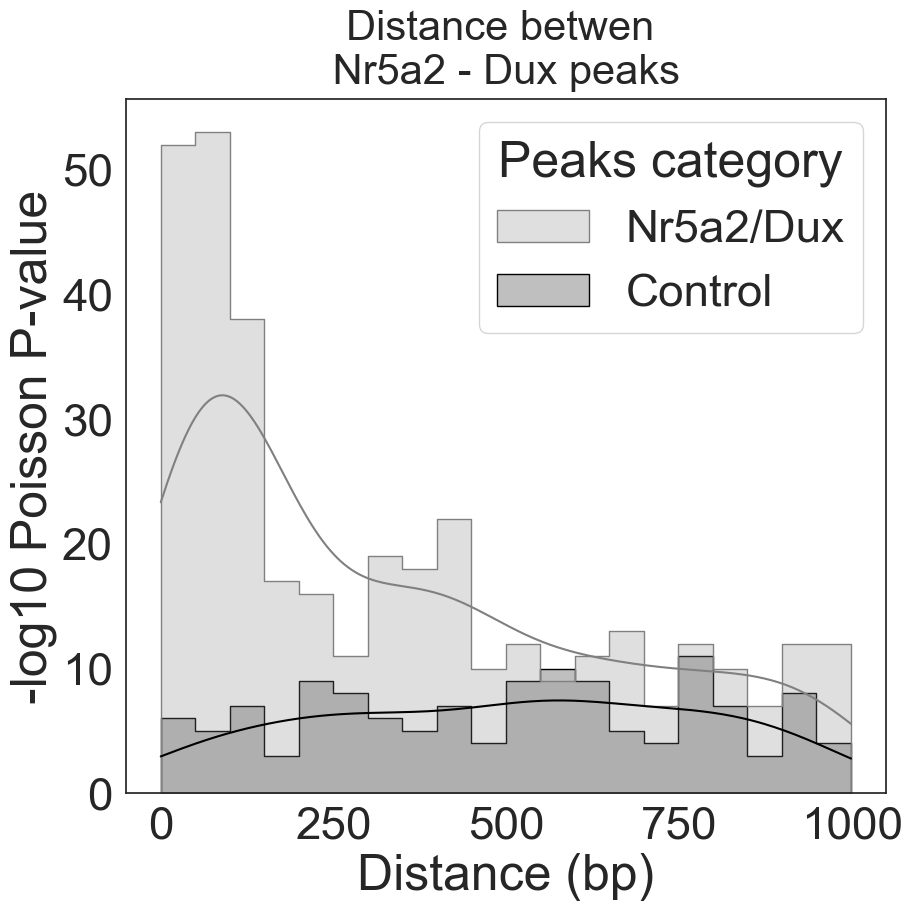

In [85]:
sns.set_theme(style="whitegrid",font_scale=3)
sns.set_style("white")
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'
matplotlib.rcParams['figure.figsize'] = 10, 10

dfff = pd.DataFrame({"x":df_poisson_h_all, "Peaks category":df_poisson_h_alln})
dfff = dfff[dfff["x"] < 1000]

ax = sns.histplot(data=dfff, x="x", hue="Peaks category", bins=20, kde=True, element="step", palette=["gray", "black"])
ax.set(xlabel='Distance (bp)', ylabel='-log10 Poisson P-value')
plt.title(f"Distance betwen \n {TF1n} - {TF2n} peaks ", fontsize=30, y=1.01)
plt.tight_layout()
out_pdf = f"./figures/{TF1n}_peak_{TF2n}_peak.pdf"
plt.savefig(out_pdf)
plt.show()

In [86]:
# Importing mm10_repeatmasker table
mm10_repeatmasker = pd.read_csv('./mm10_repeatmasker.csv',sep="\t")
mm10_repeatmasker.columns = ['#bin', 'swScore', 'milliDiv', 'milliDel', 'milliIns', 'genoName',
       'genoStart', 'genoEnd', 'genoLeft', 'strand', 'repName', 'repClass',
       'repFamily', 'repStart', 'repEnd', 'repLeft', 'id']
mm10_repeatmasker = mm10_repeatmasker[["genoName","genoStart","genoEnd","strand","repName","repClass","repFamily"]].dropna()
mm10_repeatmasker = mm10_repeatmasker[[True if len(chromosome)<6 else False for chromosome in list(mm10_repeatmasker["genoName"])]]

In [87]:
mm10_repeatmasker[mm10_repeatmasker["repFamily"] == "Alu"].to_csv('./tables/mm10_repeatmasker.bed', sep=" ", header=None, index=False)

In [88]:
def caclulate_poisson_p(df):
    
    df["distance"] = abs(df[6])
    Counter_df = Counter(df["distance"])
    d_compare = {}

    for i in list(Counter_df.keys()):
        if i not in list(d_compare.keys()):
            d_compare[i] = Counter_df[i]
        else:
            d_compare[i] = d_compare[i] + Counter_df[i]

    df_tmp = pd.DataFrame({"Keys":d_compare.keys(), "Values":d_compare.values()})
    df_tmp = df_tmp.sort_values("Keys", ascending=True)
    df_tmp = df_tmp[df_tmp["Keys"] < 1000]
    df_tmp["-log10 Poisson P-value"] = -1 * np.array([poisson(list(simulated_distances_df_sorted_grouped[x == simulated_distances_df_sorted_grouped["Keys"]]["Values_mean"])[0]).logpmf(d_compare[x]) if x in simulated_distances_df_sorted_grouped["Keys"] else 0 for x in df_tmp["Keys"]])
    df_tmp = df_tmp.reset_index(drop=True)

    return df_tmp

In [89]:
# Calculating overlap and number of RE
df_poisson = pbt.BedTool.from_dataframe(TF1).sort().closest(pbt.BedTool.from_dataframe(TF2).sort(), t="all", D="a").to_dataframe(disable_auto_names=True, header=None)

df_poisson["distance"] = abs(df_poisson[6])
df_closest = df_poisson[(df_poisson["distance"] < 100)]
df_closest = df_closest[[0,1,2]]

pbt_df_rep = pbt.BedTool.from_dataframe(mm10_repeatmasker)
pbt_df_peaks = pbt.BedTool.from_dataframe(df_closest)
pbt_df_int = pbt.BedTool.intersect(pbt_df_peaks, pbt_df_rep, wb=True, v=False)

pbt_df_int = pbt_df_int.to_dataframe()
pbt_df_int = pbt_df_int.drop_duplicates()
rep_count = pbt_df_int.groupby(['blockCount']).size().reset_index(name='counts').sort_values("counts", ascending=False)
rep_count["counts_norm"] = rep_count["counts"]/df_closest.shape[0]*100

In [90]:
df_closest.to_csv(f"df_closest_{TF1n}_peak_{TF2n}_peak.bed", header=None, index=False)

In [91]:
rep_count = rep_count.replace("Alu", "SINE B1/Alu")

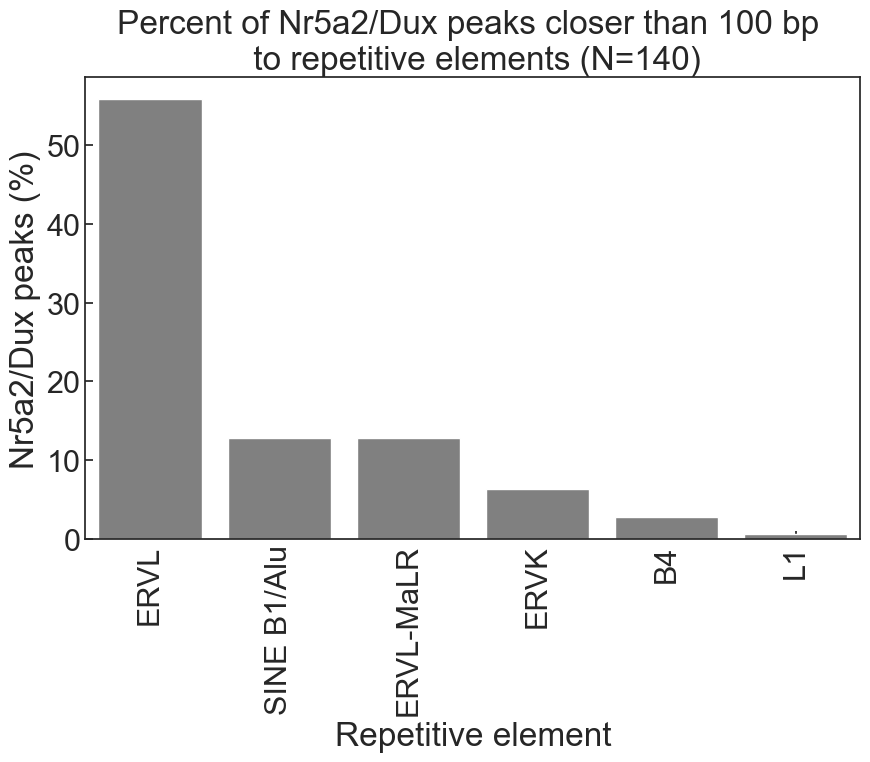

In [92]:
sns.set(font_scale=2, style="ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
matplotlib.rcParams['font.weight'] = "medium"
matplotlib.rcParams['axes.labelweight'] = 'medium'
matplotlib.rcParams['figure.titleweight'] = 'medium'
matplotlib.rcParams['axes.titleweight'] = 'medium'
matplotlib.rcParams['figure.figsize'] = 10, 6

ax = sns.barplot(x="blockCount", y="counts_norm", data=rep_count, color="gray")
plt.xticks(rotation=90)

ax.set(xlabel='Repetitive element', ylabel=f'{TF1n}/{TF2n} peaks (%)')
plt.title(f"Percent of {TF1n}/{TF2n} peaks closer than 100 bp \n to repetitive elements (N={df_closest.shape[0]})")

out_pdf = f"./figures/{TF1n}_peak_{TF2n}_peak_by_rep_element.pdf"
plt.savefig(out_pdf)
plt.show()

In [54]:
print(f"Percentage of total peaks {TF1n}/{TF2n}:", df_closest.shape[0]/TF1.shape[0]*100, df_closest.shape[0]/TF2.shape[0]*100)

Percentage of total peaks Dux/Obox3: 2.8069004956157073 1.8337484433374844
